In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_excel('/content/fraud_data_lyst1751134022071.xlsx')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [19]:
data.shape

(14446, 15)

Population Mean

In [20]:
data_mean = data['amt'].mean()
data_mean

np.float64(124.43007337671327)

Sample Mean

In [21]:
sample_mean = data['amt'].sample(1000, random_state = 1).mean()
sample_mean

np.float64(119.85632)

Impact of sample size on sample mean - As the sample size increases, the sample mean become a better estimator of the population mean. This is one of the key Idea of central Limit Theorem.

In [22]:
sample_sizes = [10,50,100,500,1000,5000,7000]
sample_means = [data['amt'].sample(n=size, random_state=42).mean() for size in sample_sizes]
sample_means
for size, mean in zip(sample_sizes,sample_means):
  print(f'Sample size: {size}, Sample mean: {mean:.2f}')

Sample size: 10, Sample mean: 96.85
Sample size: 50, Sample mean: 88.35
Sample size: 100, Sample mean: 81.84
Sample size: 500, Sample mean: 112.07
Sample size: 1000, Sample mean: 119.55
Sample size: 5000, Sample mean: 124.00
Sample size: 7000, Sample mean: 126.53


Implement Central Limit theorem

| Sample Size (`n`) | What happens to the histogram of sample means                                                              |
| ----------------- | ---------------------------------------------------------------------------------------------------------- |
| 30                | Histogram is **roughly bell-shaped**, but still shows some spread (more variability).                      |
| 100               | Histogram becomes **more tightly clustered around the population mean**. Less spread, smoother curve.      |
| 500               | Histogram is **very narrow**, almost perfectly normal. Sample means are very close to the population mean. |


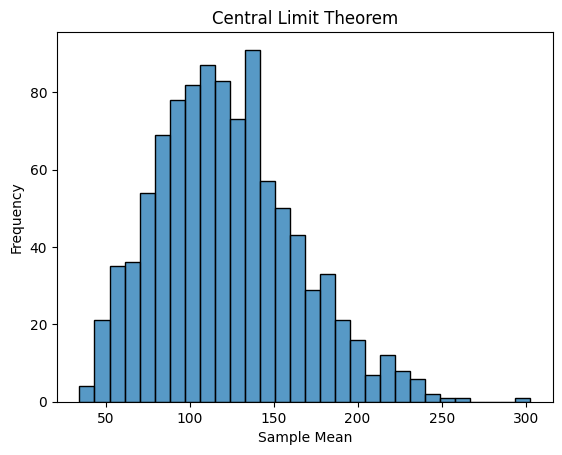

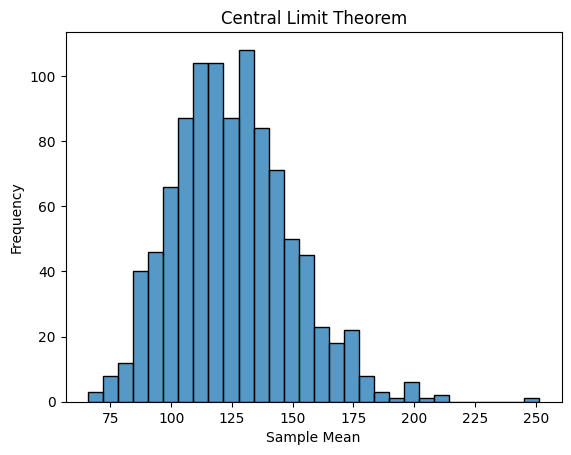

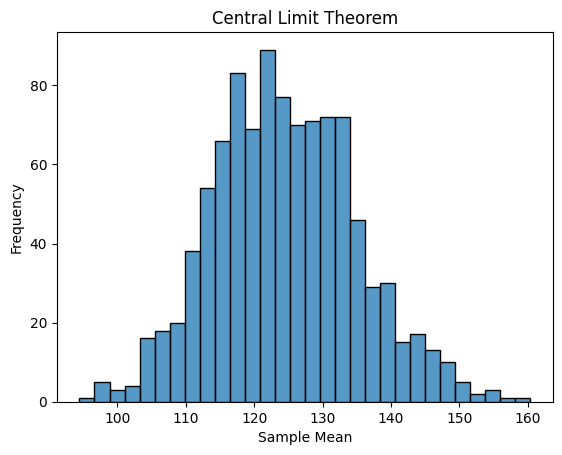

In [23]:
def visualize_clt(data, sample_size, no_of_samples):
  sample_means = [np.mean(np.random.choice(data, size = sample_size)) for _ in range(no_of_samples)]
  sns.histplot(sample_means, bins = 30, edgecolor = 'black')
  plt.title('Central Limit Theorem')
  plt.xlabel('Sample Mean')
  plt.ylabel('Frequency')
  plt.show()

visualize_clt(data['amt'], 30, 1000)
visualize_clt(data['amt'], 100, 1000)
visualize_clt(data['amt'], 500, 1000)



Ques - Difference between sample mean vs sampling distribution mean
1. Sample Mean - The average of data points in a single sample. It varies from sample to sample and estimates the population mean.
2. Sampling Distribution Mean - The average of all possible sample means of the same size. It approximates the population mean according to the Central Limit Theorem.

Sampling Distribution Mean

In [24]:
sample_means_all = [np.mean(np.random.choice(data['amt'], size = 100)) for _ in range(1000)]
sample_means_all
sampling_distribution_mean = np.mean(sample_means_all)
sampling_distribution_mean

np.float64(124.4079793)

Population mean = 124.43, mean of all sample means = 124.69 ≈ population mean, showing CLT in action.

Population standard deviation

Text(0, 0.5, 'Standard Error')

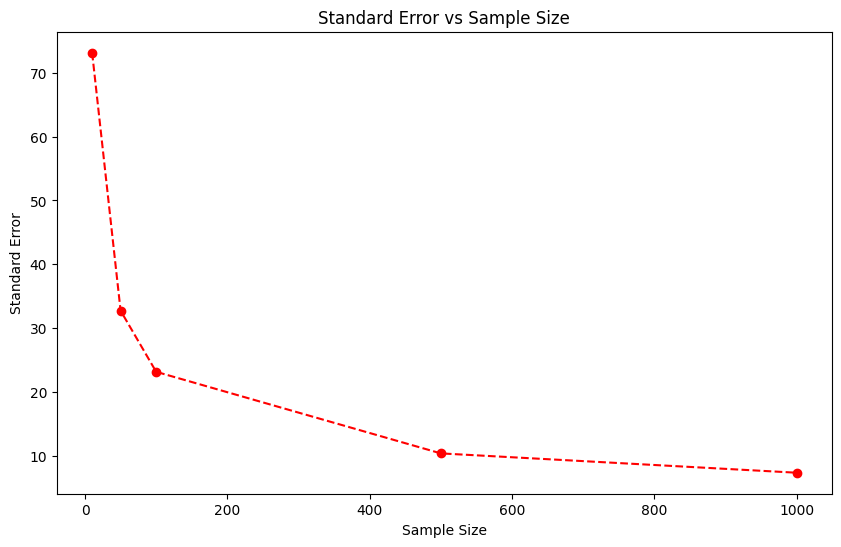

In [25]:
population_std = data['amt'].std()
sample_sizes = [10,50,100,500,1000]
standard_errors = [population_std/np.sqrt(sample_size) for sample_size in sample_sizes]
plt.figure(figsize =(10,6))
plt.plot(sample_sizes, standard_errors, marker = 'o', linestyle ='--',color = 'red')
plt.title('Standard Error vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')


Standard Error (SE) measures the spread of sample means around the population mean.
As sample size (n) increases, SE decreases, meaning the sample mean is closer to the true population mean.
Larger samples → more accurate and reliable estimates of the population mean.